# Apple Stock Price Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv(r"C:\Users\BORN 2 CODE\Downloads\AAPL (1).csv")
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,12-12-1980,0.128348,0.128906,0.128348,0.128348,0.101261,469033600.0
1,15-12-1980,0.122210,0.122210,0.121652,0.121652,0.095978,175884800.0
2,16-12-1980,0.113281,0.113281,0.112723,0.112723,0.088934,105728000.0
3,17-12-1980,0.115513,0.116071,0.115513,0.115513,0.091135,86441600.0
4,18-12-1980,0.118862,0.119420,0.118862,0.118862,0.093777,73449600.0


In [3]:
df.shape

(10016, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10016 entries, 0 to 10015
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10016 non-null  object 
 1   Open       10015 non-null  float64
 2   High       10015 non-null  float64
 3   Low        10015 non-null  float64
 4   Close      10015 non-null  float64
 5   Adj Close  10015 non-null  float64
 6   Volume     10015 non-null  float64
dtypes: float64(6), object(1)
memory usage: 547.9+ KB


In [5]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [6]:
df.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,1.001500e+04
mean,9.013322,9.107720,8.920993,9.018933,8.478195,3.413188e+08
std,16.842643,17.028099,16.677225,16.868353,16.466161,3.426534e+08
min,0.049665,0.049665,0.049107,0.049107,0.038743,1.388800e+06
25%,0.270089,0.275357,0.263951,0.270089,0.229988,1.315944e+08
50%,0.437500,0.446429,0.430357,0.437500,0.369111,2.285380e+08
75%,10.064286,10.185000,9.886071,10.102678,8.730120,4.250092e+08
max,132.759995,134.800003,130.529999,134.179993,134.179993,7.421641e+09


# Visualisation

Tovisualize the close price 

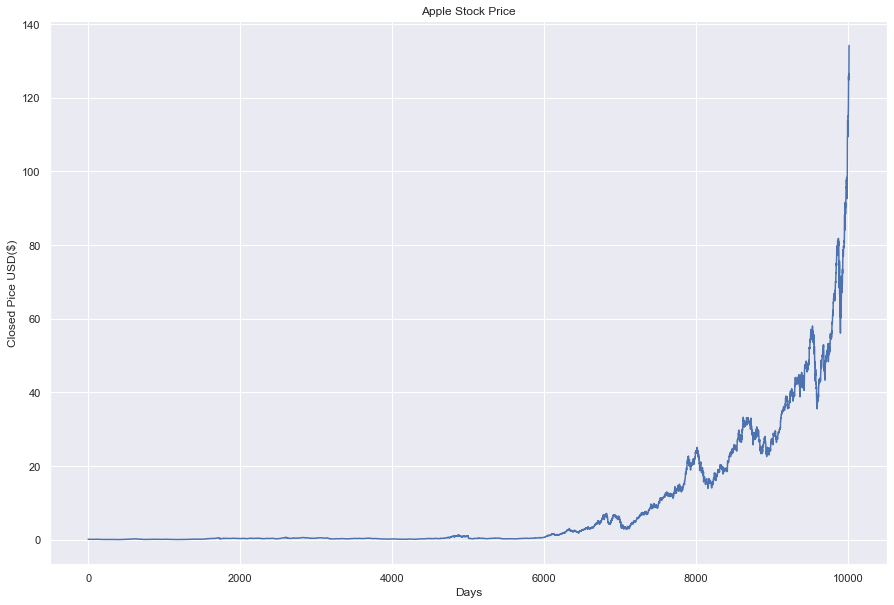

In [10]:
sns.set()
plt.figure(figsize=(15,10))
plt.title("Apple Stock Price")
plt.xlabel("Days")
plt.ylabel("Closed Pice USD($)")
plt.plot(df["Close"])
plt.show()

In [11]:
df = df[["Close"]]
df.head()

,Close
0,0.128348
1,0.121652
2,0.112723
3,0.115513
4,0.118862


In [12]:
futureDays = 25

In [13]:
df["Prediction"] = df[["Close"]].shift(-futureDays)
print(df.head())
print(df.tail())

      Close  Prediction
0  0.128348    0.142299
1  0.121652    0.145089
2  0.112723    0.146763
3  0.115513    0.146205
4  0.118862    0.143973
            Close  Prediction
10011  126.522499         NaN
10012  125.010002         NaN
10013  124.807503         NaN
10014  129.039993         NaN
10015  134.179993         NaN


In [14]:
x = np.array(df.drop(["Prediction"], 1))[:-futureDays]
print(x)

[[ 0.128348]
 [ 0.121652]
 [ 0.112723]
 ...
 [92.614998]
 [94.809998]
 [93.252502]]


In [15]:
y = np.array(df["Prediction"])[:-futureDays]
print(y)

[  0.142299   0.145089   0.146763 ... 124.807503 129.039993 134.179993]


# Train Test Split

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

# Models

In [17]:
#Decision tree regressor
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor().fit(x_train,y_train)

#Linear Regressor
from sklearn.linear_model import LinearRegression
linear = LinearRegression().fit(x_train,y_train)


In [18]:
x_future = df.drop(["Prediction"], 1)[:-futureDays]
x_future = x_future.tail(futureDays)
x_future = np.array(x_future)
print(x_future)

[[91.6325  ]
 [90.014999]
 [91.209999]
 [88.407501]
 [90.445   ]
 [91.199997]
 [91.027496]
 [91.027496]
 [93.462502]
 [93.172501]
 [95.342499]
 [95.752502]
 [95.919998]
 [95.477501]
 [97.057503]
 [97.724998]
 [96.522499]
 [96.327499]
 [98.357498]
 [97.      ]
 [97.272499]
 [92.845001]
 [92.614998]
 [94.809998]
 [93.252502]]


In [21]:
treePrediction = tree.predict(x_future)
print("Decision Tree Prediction =",treePrediction)

Decision Tree Prediction = [ 95.040001  96.190002 106.260002 108.9375   109.665001 106.260002
 113.902496 113.902496 112.727501 134.179993 114.607498 115.010002
 114.907501 114.607498 115.5625   115.707497 118.275002 118.275002
 125.857498 124.824997 126.522499 134.179993 134.179993 129.039993
 134.179993]


In [22]:
linearPrediction = linear.predict(x_future)
print("Linear Regression Prediction =",linearPrediction)

Linear Regression Prediction = [ 95.48193852  93.7947124   95.0412249   92.11792048  94.24324932
  95.03079175  94.8508548   94.8508548   97.39082585  97.08832387
  99.35186331  99.77954018  99.95425638  99.4926848  101.14079546
 101.83706396 100.5827292  100.3793234  102.49682894 101.08081369
 101.36505922  96.74670643  96.50678876  98.79640795  97.17177345]


# Visualize decision Tree Prediction

<ipython-input-24-186e805400f4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


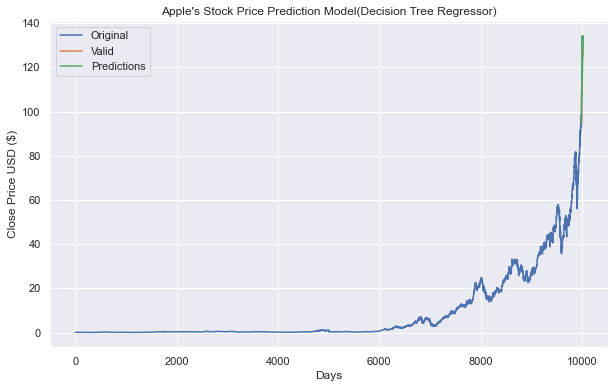

In [24]:
predictions = treePrediction
valid = df[x.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize=(10, 6))
plt.title("Apple's Stock Price Prediction Model(Decision Tree Regressor)")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(df["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Original", "Valid", "Predictions"])
plt.show()

# Visualize the linear model predictions

<ipython-input-26-74c418b28702>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


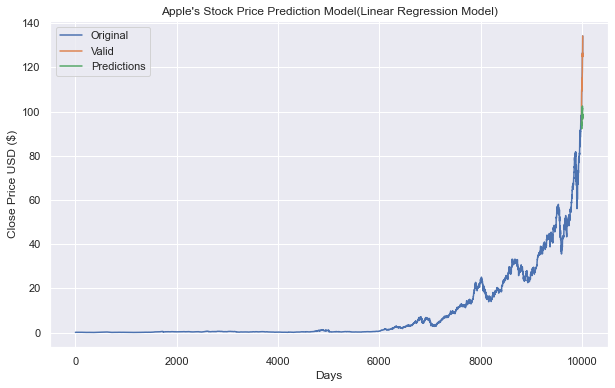

In [26]:
predictions = linearPrediction
valid = df[x.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize=(10, 6))
plt.title("Apple's Stock Price Prediction Model(Linear Regression Model)")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(df["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Original", "Valid", "Predictions"])
plt.show()